## Question 2 - Basic Bidding Strategies

### Import Libraries

In [1]:
from __future__ import print_function, division

import numpy as np
import pandas as pd
import time
import random

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.preprocessing import MultiLabelBinarizer
from random import randrange

pd.set_option('display.max_columns', 999)
pd.set_option("display.max_rows",999)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings('ignore')

In [2]:
def memory(df):
    print("Memory usage of the dataframe is {:.2f} MB".format(
        df.memory_usage().sum() / 1024**2))

In [3]:
convert = True
path = 'C:/Users/User/OneDrive/UCL/term_2/git/maai_bid_strategy'

if(convert):
    train_df = pd.read_csv(path+'/we_data/train.csv')
    train_df.to_hdf('train.h5', 'train')
    
else:
    train_df = pd.read_hdf('train.h5', 'train')
    
memory(train_df)

Memory usage of the dataframe is 463.67 MB


In [4]:
convert = True
path = 'C:/Users/User/OneDrive/UCL/term_2/git/maai_bid_strategy'

if(convert):
    val_df = pd.read_csv(path+'/we_data/validation.csv')
    val_df.to_hdf('validation.h5', 'validation')
    
else:
    val_df = pd.read_hdf('validation.h5', 'validation')
    
memory(val_df)

Memory usage of the dataframe is 57.97 MB


In [4]:
val_df.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,domain,url,urlid,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,4,20,bbcb813b6166538503d8b33a5602d7d72f6019dc,663169f66491c98c69f1f94a5c48fa34aa9fe06f,windows_ie,211.144.203.*,79,79,1.0,trqRTvFRLpscFU,5ede68cc7542a34777fb8a1574856b6f,NaN,mm_10027070_2459574_9659312,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111"
1,0,1,21,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,a23f0cfab6592c137f796e68fa752fceba08bb1b,windows_chrome,58.247.250.*,79,79,1.0,trqRTu1YP5scFsf,cff326604db401e7d4f895fd747f7e91,NaN,mm_10075660_3500949_11453278,950,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110"
2,0,4,8,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,5105a013ea54a9706146033e6a138d5234a3803e,windows_ie,117.12.111.*,2,2,2.0,trqRTv14MqTR1m58uG,93f242f025dc7d424c4ba7002b177df7,NaN,2996225656,300,250,2,0,5,911b2d84826786018761e8c0b0a3a60c,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111"
3,0,5,15,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,577e9a768ce17e73c61ba7022db927f9ee761830,windows_chrome,61.187.224.*,201,205,2.0,trqRTvdJMoFoFoc4JKn,40c388f45dbc0e1fc53a8c6c81305de5,NaN,3481684581,336,280,2,0,5,dc0998c10f8f0b623b5d949e8272e4c7,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110"
4,0,1,18,0899bf144249458ea9c89188473694bf44c7ca15,e4bf79c562745d671b19f2edf7fda89c2e25987f,windows_chrome,117.41.145.*,134,135,2.0,tKFJeun0BouoXOl4JKTI,fcf53e0e5f09aa8d7e1c9d986cea321,NaN,1120607322,200,200,1,0,5,23485fcd23122d755d38f8c89d46ca56,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110"


In [30]:
val_df.shape

(303925, 25)

In [5]:
def constant_bids(const_bid):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 6250*1000  ## Given budget of 6,250 CNY Fen
        
    for price_paid, click in val_df[['payprice','click']].values:
            if price_paid =< budget and const_bid >= price_paid:
                impression += 1
                clicks += click
                cost += price_paid
                budget -= price_paid
    return impression, clicks, cost

def random_bids(rand_bid):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 6250*1000  ## Given budget of 6,250 CNY Fen

    for price_paid, click in val_df[['payprice','click']].values:
#         rand_bid = randrange(bid)
        if price_paid =< budget and rand_bid >= price_paid:
            impression += 1
            clicks += click
            cost += price_paid
            budget -= price_paid
    return impression, clicks, cost

def competitor_bids(rand_bid, other_bids):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 6250*1000  ## Given budget of 6,250 CNY Fen

    for price_paid, click in val_df[['payprice','click']].values:
        if price_paid =< budget and rand_bid > max(other_bids) and rand_bid >= price_paid:
            impression += 1
            clicks += click
            if max(other_bids) >= price_paid:
                cost += max(other_bids)
                budget -= max(other_bids)
            else:
                cost += price_paid
                budget -= price_paid                
    return impression, clicks, cost

def bounds(df, l_list, u_list):
    
    df['lower_bound'] = l_list
    df['upper_bound'] = u_list
    
    return df

def calc_impression(df, input_list):
    
    input_list = [int(x) for x in input_list]
    df['impression_won'] = input_list
    
    return df

def calc_clicks(df, input_list):
    
    df['clicks'] = input_list
    df['ctr'] = (df['clicks']/df['impression_won'] * 100).round(4).astype(str)
    
    return df 

def calc_costs(df,input_list):
    
    input_list = [x / 1000 for x in input_list]
    df['total_spend'] = input_list
    df['cpm'] = (df['total_spend']/df['impression_won'] * 1000).round(2).astype(str)
    df['cpc'] = (df['total_spend']/df['clicks']).round(2).astype(str)
    
    return df

### Part 1 - Constant Bidding

In [6]:
%%time
min_bid = np.min(val_df["payprice"].values)
max_bid = np.max(val_df["payprice"].values)

bid_range = np.arange(min_bid+2, max_bid+2, 2) # determines the range that bids should be in

impression_list = []
clicks_list = []
cost_list = []
for i in bid_range:
    [impressions, clicks, costs] = constant_bids(i)
    impression_list.append(impressions)
    clicks_list.append(clicks)
    cost_list.append(costs)

Wall time: 50.3 s


In [9]:
const_df = pd.DataFrame()
const_df['constant_bids'] = bid_range   

const_df = calc_impression(const_df,impression_list)
const_df = calc_clicks(const_df,clicks_list)
const_df = calc_costs(const_df,cost_list)

In [10]:
const_df

,constant_bids,impression_won,clicks,ctr,total_spend,cpm,cpc
0,2,851,0,0.0,1.247,1.47,inf
1,4,2176,0,0.0,6.455,2.97,inf
2,6,9624,4,0.0416,45.486,4.73,11.37
3,8,12373,4,0.0323,65.999,5.33,16.5
4,10,16434,4,0.0243,105.274,6.41,26.32
5,12,20368,5,0.0245,150.373,7.38,30.07
6,14,23489,5,0.0213,192.564,8.2,38.51
7,16,27238,8,0.0294,250.979,9.21,31.37
8,18,31880,10,0.0314,332.140,10.42,33.21
9,20,47162,13,0.0276,636.129,13.49,48.93


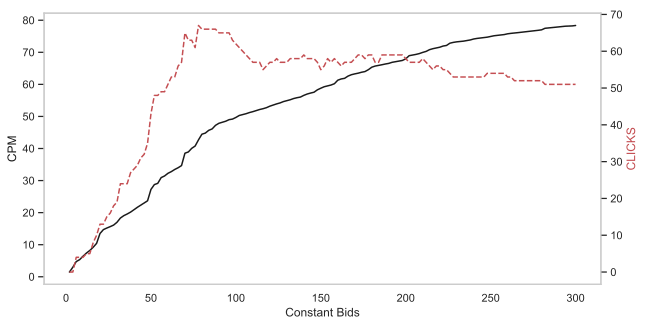

In [61]:
fig, ax1 = plt.subplots()
ax1.plot(const_df['constant_bids'].astype(float),const_df['cpm'].astype(float),color='k')
ax1.set_xlabel('Constant Bids')
ax1.set_ylabel('CPM', color='k')
ax1.grid(False)

ax2 = ax1.twinx()
ax2.plot(const_df['constant_bids'].astype(float), const_df['clicks'].astype(float),color='r',linestyle='--')
ax2.set_ylabel('CLICKS', color='r')
ax2.grid(False)
fig.set_size_inches(10, 5)

# fig.savefig('constant.PNG', dpi=200)

plt.show()

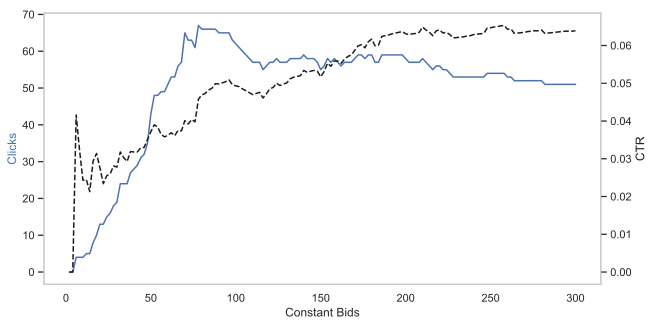

In [62]:
fig, ax1 = plt.subplots()
ax1.plot(const_df['constant_bids'].astype(float),const_df['clicks'].astype(float))
ax1.set_xlabel('Constant Bids')
ax1.set_ylabel('Clicks', color='b')
ax1.grid(False)

ax2 = ax1.twinx()
ax2.plot(const_df['constant_bids'].astype(float), const_df['ctr'].astype(float),color='k',linestyle='--')
ax2.set_ylabel('CTR', color='k')
ax2.grid(False)
fig.set_size_inches(10, 5)

# fig.savefig('constant.PNG', dpi=200)

plt.show()

In [11]:
winning_bid_ctr = const_df[const_df['ctr'] == max(const_df['ctr'])]
winning_bid_ctr

,constant_bids,impression_won,clicks,ctr,total_spend,cpm,cpc
128,258,82750,54,0.0653,6249.999,75.53,115.74


In [64]:
winning_bid_clicks = const_df[const_df['clicks'] == max(const_df['clicks'])]
winning_bid_clicks

,constant_bids,impression_won,clicks,ctr,total_spend,cpm,cpc
38,78,146338,67,0.0458,6249.999,42.71,93.28


#### Comments :

### Part 2 - Random Bidding

In [41]:
%%time
m = 30
bid_range = np.arange(min_bid, max_bid-m, 1)
upper_bound = []
lower_bound = []
impression_list = []
clicks_list = []
cost_list = []
for i in range(1,501):
    rnd = random.choice(bid_range)
    lower_bound.append(rnd)
    upper_bound.append(rnd+m)
    i_list = []
    cl_list = []
    c_list = []
    for j in range(rnd,rnd+m,2):
        [impressions, clicks, costs] = random_bids(j)
        i_list.append(impressions)
        cl_list.append(clicks)
        c_list.append(costs)
    impression_list.append(sum(i_list)/len(i_list))
    clicks_list.append(sum(cl_list)/len(cl_list))
    cost_list.append(sum(c_list)/len(c_list))

Wall time: 45min 20s


In [42]:
rand_df = pd.DataFrame()
rand_df = bounds(rand_df,lower_bound,upper_bound)

rand_df = calc_impression(rand_df,impression_list)
rand_df = calc_clicks(rand_df,clicks_list)
rand_df = calc_costs(rand_df,cost_list)

In [43]:
rand_df

,lower_bound,upper_bound,impression_won,clicks,ctr,total_spend,cpm,cpc
0,82,112,128544,62.933333,0.049,6249.999000,48.62,99.31
1,250,280,82277,52.800000,0.0642,6249.999000,75.96,118.37
2,205,235,87477,55.200000,0.0631,6249.999000,71.45,113.22
3,76,106,133472,64.266667,0.0481,6249.999000,46.83,97.25
4,121,151,112185,57.466667,0.0512,6249.999000,55.71,108.76
5,189,219,90937,57.600000,0.0633,6249.999000,68.73,108.51
6,115,145,114324,57.333333,0.0501,6249.999000,54.67,109.01
7,145,175,103095,57.333333,0.0556,6249.999000,60.62,109.01
8,202,232,88030,55.733333,0.0633,6249.999000,71.0,112.14
9,125,155,110686,57.400000,0.0519,6249.999000,56.47,108.88


In [459]:
winning_bid_clicks

,constant_bids,impression_won,clicks,ctr,total_spend,cpm,cpc
38,78,146338,67,0.0458,6249.999,42.71,93.28


In [469]:
best_bound_clicks = rand_df[rand_df['clicks'] == max(rand_df['clicks'])]
best_bound_clicks

,lower_bound,upper_bound,impression_won,clicks,ctr,total_spend,cpm,cpc
304,77,87,141592,67.0,0.0473,6249.999,44.14,93.28


In [460]:
winning_bid_ctr

,constant_bids,impression_won,clicks,ctr,total_spend,cpm,cpc
128,258,82750,54,0.0653,6249.999,75.53,115.74


In [44]:
best_bound_ctr = rand_df[rand_df['ctr'] == max(rand_df['ctr'])]
best_bound_ctr

,lower_bound,upper_bound,impression_won,clicks,ctr,total_spend,cpm,cpc
32,249,279,82367,52.933333,0.0643,6249.999,75.88,118.07
46,249,279,82367,52.933333,0.0643,6249.999,75.88,118.07
149,249,279,82367,52.933333,0.0643,6249.999,75.88,118.07
449,249,279,82367,52.933333,0.0643,6249.999,75.88,118.07


#### Comments:

### Part 3 - Random Bidding with  Competitions

Takes Very Very Long to Run.

##### n = 50

In [13]:
%%time
m = 30
n = 50
bid_range = np.arange(min_bid, max_bid-m, 1)
# comp_bid = np.arange(min_bid, max_bid-m, 1)
upper_bound = []
lower_bound = []
impression_list = []
clicks_list = []
cost_list = []
for i in range(1,501):
    rnd = random.choice(bid_range)
    compt = random.sample(range(min_bid, max_bid-m), n)
    lower_bound.append(rnd)
    upper_bound.append(rnd+m)
    i_list = []
    cl_list = []
    c_list = []
    for j in range(rnd,rnd+m,1):
        [impressions, clicks, costs] = competitor_bids(j,compt)
        i_list.append(impressions)
        cl_list.append(clicks)
        c_list.append(costs)
    impression_list.append(sum(i_list)/len(i_list))
    clicks_list.append(sum(cl_list)/len(cl_list))
    cost_list.append(sum(c_list)/len(c_list))

Wall time: 2h 44min 40s


In [14]:
comp_df = pd.DataFrame()
comp_df = bounds(comp_df,lower_bound,upper_bound)

comp_df = calc_impression(comp_df,impression_list)
comp_df = calc_clicks(comp_df,clicks_list)
comp_df = calc_costs(comp_df,cost_list)

In [15]:
comp_df

,lower_bound,upper_bound,impression_won,clicks,ctr,total_spend,cpm,cpc
0,46,76,0,0.000000,nan,0.000000,nan,nan
1,84,114,0,0.000000,nan,0.000000,nan,nan
2,145,175,0,0.000000,nan,0.000000,nan,nan
3,230,260,0,0.000000,nan,0.000000,nan,nan
4,10,40,0,0.000000,nan,0.000000,nan,nan
5,198,228,0,0.000000,nan,0.000000,nan,nan
6,26,56,0,0.000000,nan,0.000000,nan,nan
7,256,286,14879,8.866667,0.0596,3958.426700,266.04,446.44
8,2,32,0,0.000000,nan,0.000000,nan,nan
9,84,114,0,0.000000,nan,0.000000,nan,nan


In [16]:
# best_bound2_ctr = comp_df[(comp_df['ctr'] == max(comp_df['ctr'])) & (comp_df['ctr'] != 'nan')]
best_bound2_ctr = comp_df[(comp_df['ctr'] != 'nan')]
best_bound2_ctr[(best_bound2_ctr['ctr'] == max(best_bound2_ctr['ctr']))]

,lower_bound,upper_bound,impression_won,clicks,ctr,total_spend,cpm,cpc
62,265,295,19359,11.666667,0.0603,5208.460400,269.05,446.44
102,260,290,15488,9.333333,0.0603,4166.765000,269.03,446.44
248,268,298,21681,13.066667,0.0603,5833.472667,269.06,446.44
258,248,278,6195,3.733333,0.0603,1666.698933,269.04,446.44
440,260,290,15488,9.333333,0.0603,4166.765000,269.03,446.44


#### n = 100

In [ ]:
%%time
m = 30
n = 100
bid_range = np.arange(min_bid, max_bid-m, 1)
# comp_bid = np.arange(min_bid, max_bid-m, 1)
upper_bound = []
lower_bound = []
impression_list = []
clicks_list = []
cost_list = []
for i in range(1,501):
    rnd = random.choice(bid_range)
    compt = random.sample(range(min_bid, max_bid-m), n)
    lower_bound.append(rnd)
    upper_bound.append(rnd+m)
    i_list = []
    cl_list = []
    c_list = []
    for j in range(rnd,rnd+m,1):
        [impressions, clicks, costs] = competitor_bids(j,compt)
        i_list.append(impressions)
        cl_list.append(clicks)
        c_list.append(costs)
    impression_list.append(sum(i_list)/len(i_list))
    clicks_list.append(sum(cl_list)/len(cl_list))
    cost_list.append(sum(c_list)/len(c_list))